In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("Real Estate Data.csv")

# Quick check
print(df.shape)
print(df.columns)
df.head()






(14528, 9)
Index(['Name', 'Property Title', 'Price', 'Location', 'Total_Area',
       'Price_per_SQFT', 'Description', 'Baths', 'Balcony'],
      dtype='object')


,Name,Property Title,Price,Location,Total_Area,Price_per_SQFT,Description,Baths,Balcony
0,Casagrand ECR 14,"4 BHK Flat for sale in Kanathur Reddikuppam, C...",₹1.99 Cr,"Kanathur Reddikuppam, Chennai",2583,7700.0,Best 4 BHK Apartment for modern-day lifestyle ...,4,Yes
1,"Ramanathan Nagar, Pozhichalur,Chennai",10 BHK Independent House for sale in Pozhichal...,₹2.25 Cr,"Ramanathan Nagar, Pozhichalur,Chennai",7000,3210.0,Looking for a 10 BHK Independent House for sal...,6,Yes
2,DAC Prapthi,"3 BHK Flat for sale in West Tambaram, Chennai",₹1.0 Cr,"Kasthuribai Nagar, West Tambaram,Chennai",1320,7580.0,"Property for sale in Tambaram, Chennai. This 3...",3,No
3,"Naveenilaya,Chepauk, Triplicane,Chennai",7 BHK Independent House for sale in Triplicane...,₹3.33 Cr,"Naveenilaya,Chepauk, Triplicane,Chennai",4250,7840.0,Entire Building for sale with 7 units of singl...,5,Yes
4,VGN Spring Field Phase 1,"2 BHK Flat for sale in Avadi, Chennai",₹48.0 L,"Avadi, Chennai",960,5000.0,"Property for sale in Avadi, Chennai. This 2 BH...",3,Yes


In [4]:
df['Total_Area'] = df['Total_Area'].astype(str).str.replace('[^0-9.]', '', regex=True)
df['Total_Area'] = pd.to_numeric(df['Total_Area'], errors='coerce')


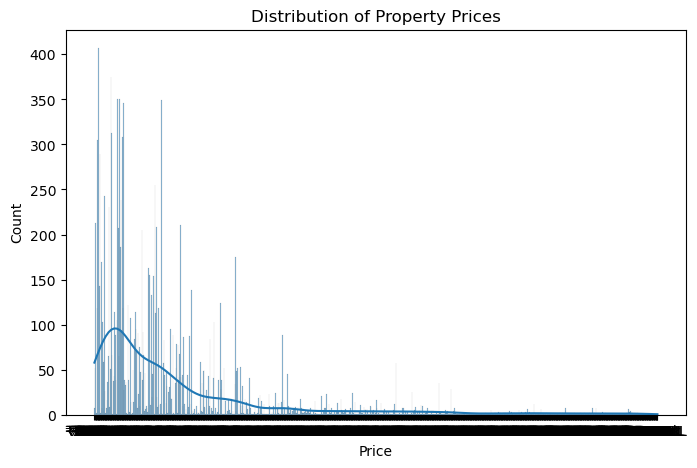

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title("Distribution of Property Prices")
plt.show()



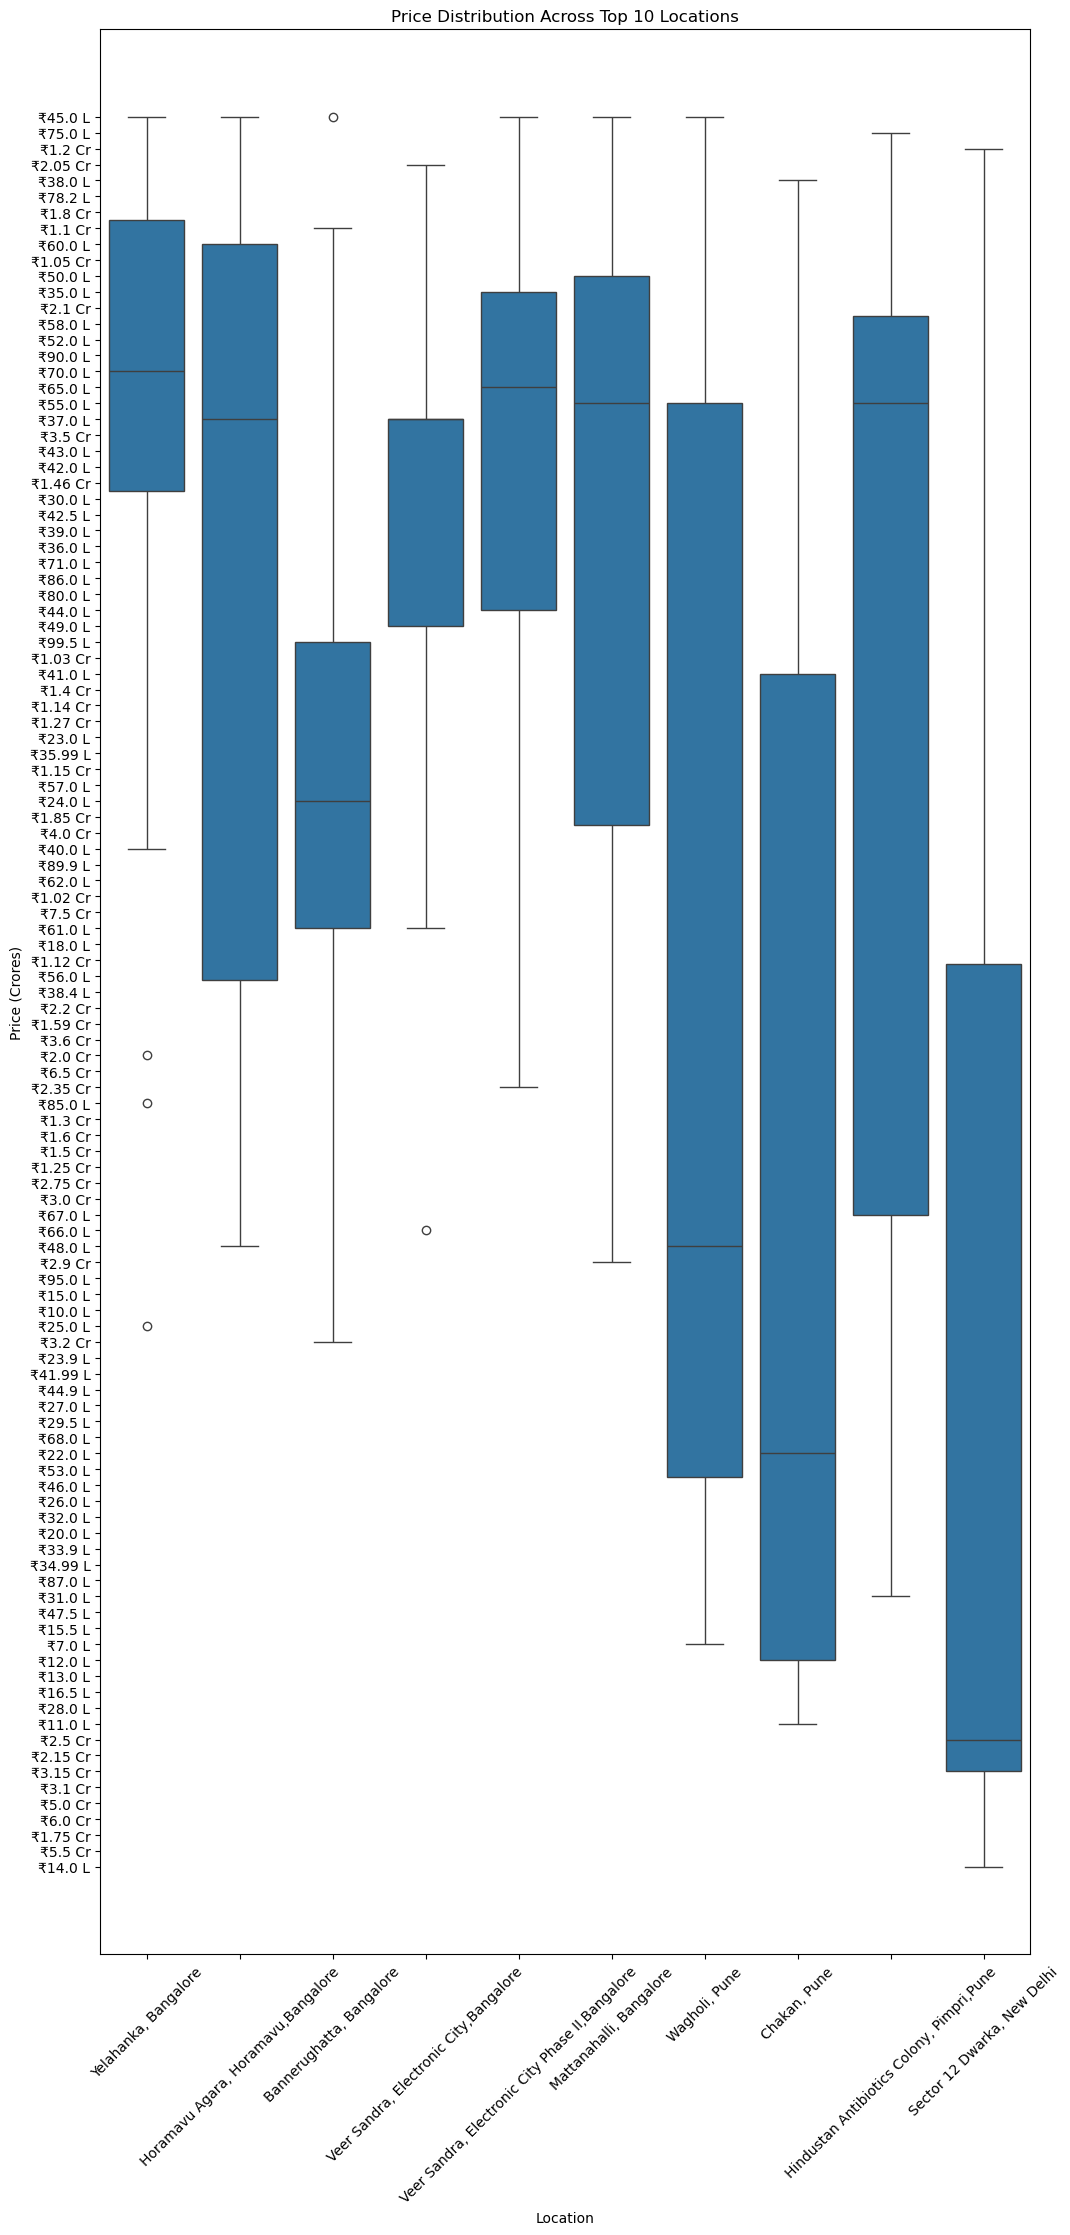

In [27]:
plt.figure(figsize=(12,25))
top_locations = df['Location'].value_counts().head(10).index
sns.boxplot(x="Location", y="Price", data=df[df['Location'].isin(top_locations)])
plt.xticks(rotation=45)
plt.title("Price Distribution Across Top 10 Locations")
plt.ylabel("Price (Crores)")
plt.show()


In [ ]:
PRICE VS TOTAL AREA

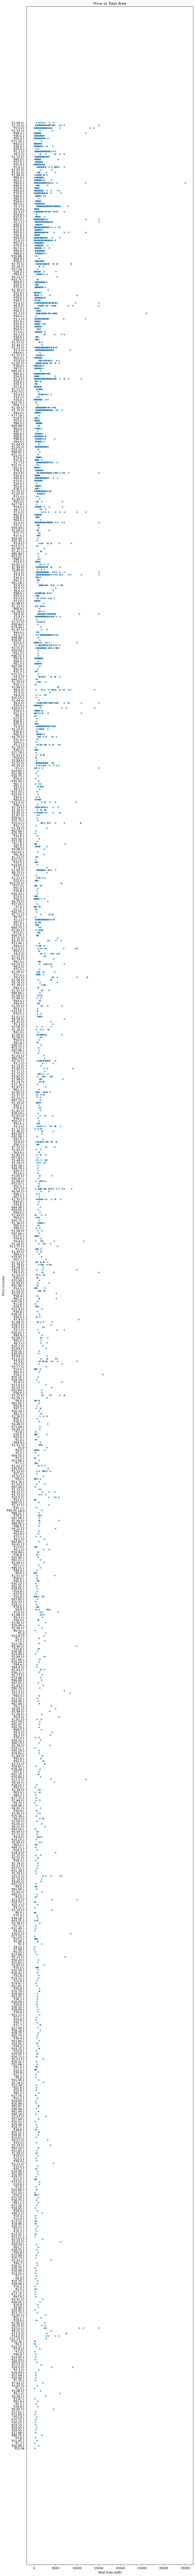

In [36]:
plt.figure(figsize=(10,155))
sns.scatterplot(x='Total_Area', y='Price', data=df, alpha=0.6)
plt.title("Price vs Total Area")
plt.xlabel("Total Area (sqft)")
plt.ylabel("Price (Crores)")
plt.show()


In [39]:
print(df.columns)


Index(['Name', 'Property Title', 'Price', 'Location', 'Total_Area',
       'Price_per_SQFT', 'Description', 'Baths', 'Balcony'],
      dtype='object')


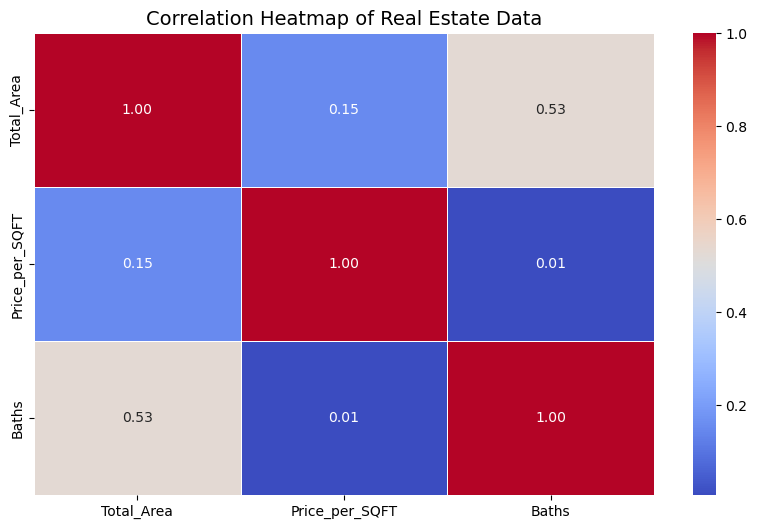

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Create correlation matrix
corr = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Real Estate Data", fontsize=14)
plt.show()





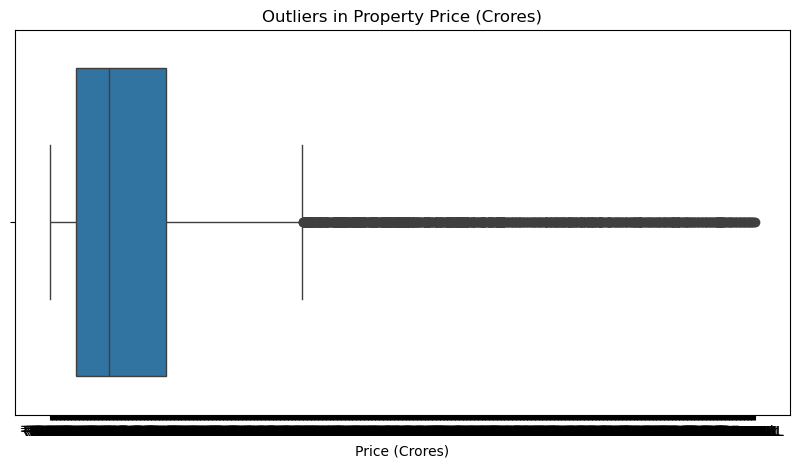

In [53]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Price'])
plt.title("Outliers in Property Price (Crores)")
plt.xlabel("Price (Crores)")
plt.show()




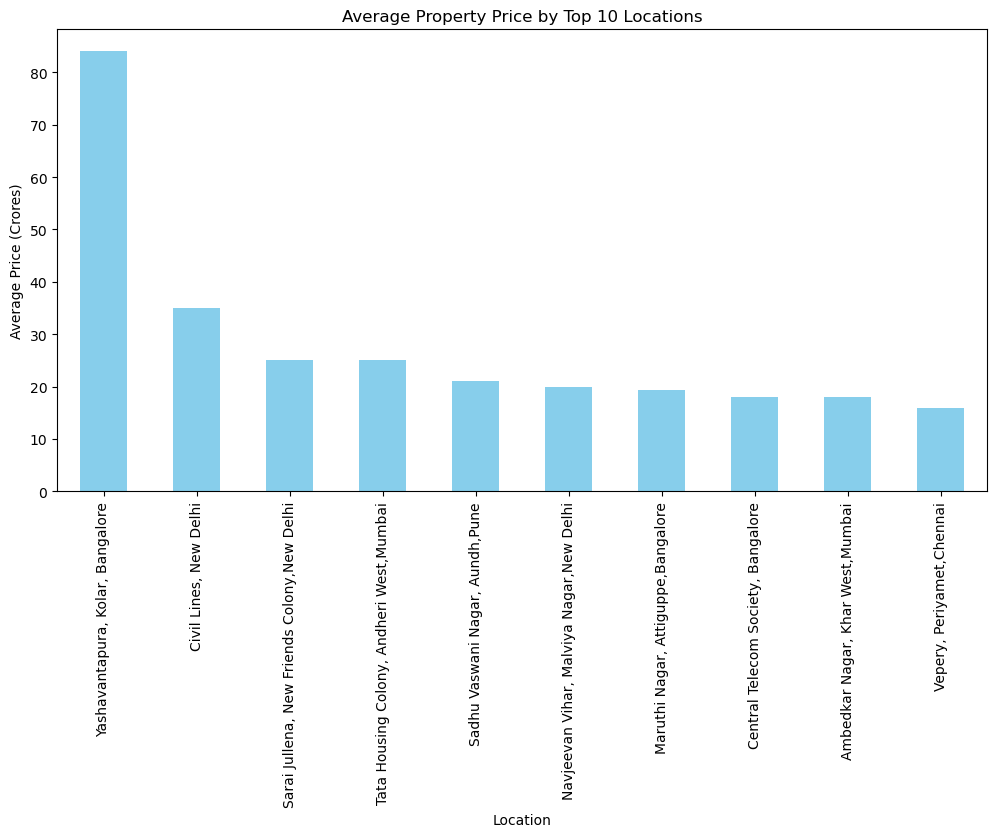

In [56]:
import re
import pandas as pd

# Function to clean and convert price
def clean_price(price):
    if pd.isna(price):  # Handle missing values
        return None
    price = str(price).replace("₹", "").replace(",", "").strip()
    if "Cr" in price:
        return float(re.sub(r"[^\d.]", "", price)) * 100  # 1 Cr = 100 Lakhs
    elif "Lac" in price or "Lakh" in price:
        return float(re.sub(r"[^\d.]", "", price))  # Already in Lakhs
    else:
        return pd.to_numeric(re.sub(r"[^\d.]", "", price), errors="coerce")

# Apply cleaning
df["Price_Lakhs"] = df["Price"].apply(clean_price)

# Convert Lakhs → Crores (optional, easier scale for plots)
df["Price_Crore"] = df["Price_Lakhs"] / 100  

# Now group by Location
avg_price = df.groupby("Location")["Price_Crore"].mean().sort_values(ascending=False).head(10)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
avg_price.plot(kind="bar", color="skyblue")
plt.title("Average Property Price by Top 10 Locations")
plt.ylabel("Average Price (Crores)")
plt.show()



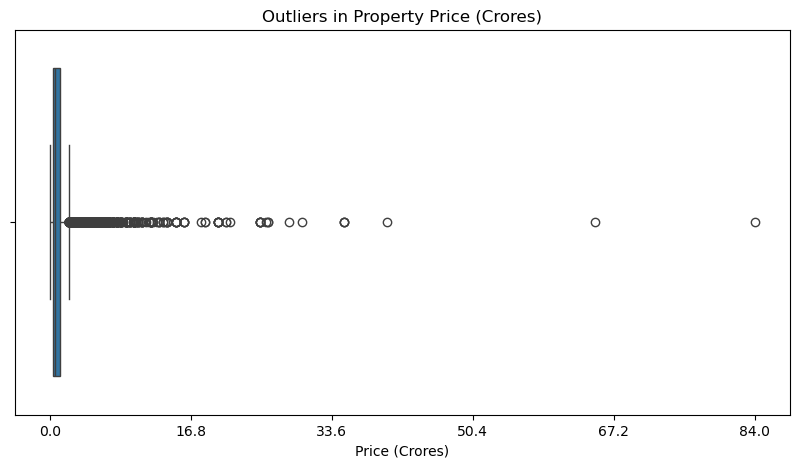

In [57]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Price_Crore'])  # use the cleaned numeric column
plt.title("Outliers in Property Price (Crores)")
plt.xlabel("Price (Crores)")

# Show only a few ticks on X-axis
import numpy as np
plt.xticks(
    ticks=np.linspace(df['Price_Crore'].min(), df['Price_Crore'].max(), 6),
    labels=[f"{x:.1f}" for x in np.linspace(df['Price_Crore'].min(), df['Price_Crore'].max(), 6)]
)

plt.show()
